# Advanced Experimentation

# Challenge: What test to use

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [42]:
# Loading the data again.

df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv")
  
# Take a subset of the data to make plots clearer.
print('The shape of the data is:', df.shape)
df.head()

The shape of the data is: (8594, 13)


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

# Clean Data 

In [43]:
df.columns

Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner'],
      dtype='object')

In [40]:
df.year.value_counts()

7    4297
6    4297
Name: year, dtype: int64

In [39]:
df.cntry.value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

In [44]:
# Count nulls 
null_count = df.isnull().sum()
null_count[null_count>0]

tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [46]:
# Dividing the sample into the 2 differnt years 
df_2012 = df[df['year']== 6]
df_2014 = df[df['year']== 7]

In [47]:
## Assumption: the Median is a good enough representative of the missing data 
## review not filled means its best possible 
df_2012 = df_2012.apply(lambda x: x.fillna(value = x.median()) if x.dtype.kind in 'biufc' else x.fillna('.'))
df_2014 = df_2014.apply(lambda x: x.fillna(value = x.median()) if x.dtype.kind in 'biufc' else x.fillna('.'))

In [48]:
# Count nulls 
null_count = df_2012.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

In [49]:
# Count nulls 
null_count = df_2014.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

In [17]:
df_2012.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


## Q1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

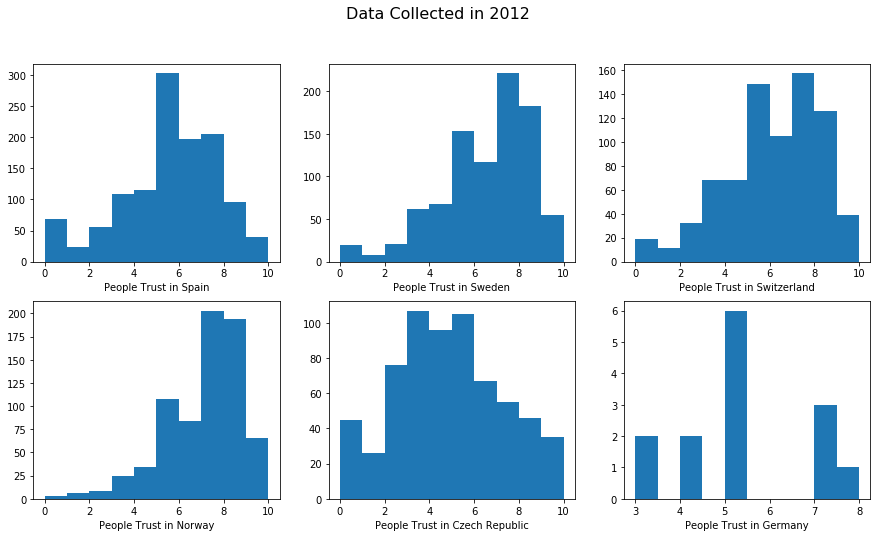

In [88]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.hist(df_2012.loc[df_2012['cntry'] =='ES', 'ppltrst'])
plt.xlabel('People Trust in Spain')


plt.subplot(2, 3, 2)

plt.hist(df_2012.loc[df_2012['cntry'] =='SE', 'ppltrst'])
plt.xlabel('People Trust in Sweden')

plt.subplot(2, 3, 3)

plt.hist(df_2012.loc[df_2012['cntry'] =='CH', 'ppltrst'])
plt.xlabel('People Trust in Switzerland')


plt.subplot(2, 3, 4)
plt.hist(df_2012.loc[df_2012['cntry'] =='NO', 'ppltrst'])
plt.xlabel('People Trust in Norway')


plt.subplot(2, 3, 5)

plt.hist(df_2012.loc[df_2012['cntry'] =='CZ', 'ppltrst'])
plt.xlabel('People Trust in Czech Republic')

plt.subplot(2, 3, 6)

plt.hist(df_2012.loc[df_2012['cntry'] =='DE', 'ppltrst'])
plt.xlabel('People Trust in Germany')

plt.suptitle('Data Collected in 2012', size = 16)
plt.show()

Most of the graphs for the different countries are negatively skewed, except for the Czech Republic.

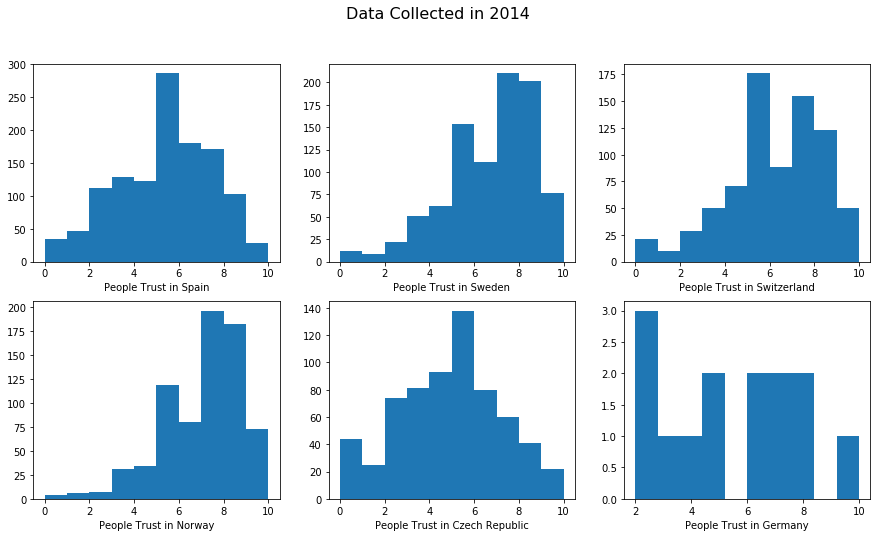

In [89]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.hist(df_2014.loc[df_2014['cntry'] =='ES', 'ppltrst'])
plt.xlabel('People Trust in Spain')


plt.subplot(2, 3, 2)

plt.hist(df_2014.loc[df_2014['cntry'] =='SE', 'ppltrst'])
plt.xlabel('People Trust in Sweden')

plt.subplot(2, 3, 3)

plt.hist(df_2014.loc[df_2014['cntry'] =='CH', 'ppltrst'])
plt.xlabel('People Trust in Switzerland')


plt.subplot(2, 3, 4)
plt.hist(df_2014.loc[df_2014['cntry'] =='NO', 'ppltrst'])
plt.xlabel('People Trust in Norway')


plt.subplot(2, 3, 5)

plt.hist(df_2014.loc[df_2014['cntry'] =='CZ', 'ppltrst'])
plt.xlabel('People Trust in Czech Republic')

plt.subplot(2, 3, 6)

plt.hist(df_2014.loc[df_2014['cntry'] =='DE', 'ppltrst'])
plt.xlabel('People Trust in Germany')

plt.suptitle('Data Collected in 2014', size = 16)
plt.show()

In [25]:
df_2012['ppltrst'].median()

5.563097737345463

In [52]:
df_2014['ppltrst'].median()

6.0

In [27]:
# Count nulls 
null_count = df.isnull().sum()
null_count[null_count>0]

tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [53]:
# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
stats.kruskal(
    df_2012['ppltrst'],
    df_2014['ppltrst'])

KruskalResult(statistic=0.16034653885979291, pvalue=0.68883766718041284)

pvalue>0.05 the null hypothesis is not rejected      
Ther is a 68% chance that the 2 sets are similar.    
This is just comparing the trust from 2012 and 2014 not by countries .   

In [74]:
# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
print('For Spain we have', stats.kruskal(
    df_2012.loc[df_2012['cntry'] =='ES', 'ppltrst'],
    df_2014.loc[df_2014['cntry'] =='ES', 'ppltrst']))

print('\nFor Sweden we have', stats.kruskal(
    df_2012.loc[df_2012['cntry'] =='SE', 'ppltrst'],
    df_2014.loc[df_2014['cntry'] =='SE', 'ppltrst']))

print('\nFor Switerzeland we have', stats.kruskal(
    df_2012.loc[df_2012['cntry'] =='CH', 'ppltrst'],
    df_2014.loc[df_2014['cntry'] =='CH', 'ppltrst']))

print('\nFor Norway we have', stats.kruskal(
    df_2012.loc[df_2012['cntry'] =='NO', 'ppltrst'],
    df_2014.loc[df_2014['cntry'] =='NO', 'ppltrst']))

### Using T-test b/c parametric
print('\nFor Germany we have', stats.ttest_ind(
    df_2012.loc[df_2012['cntry'] =='DE', 'ppltrst'],
    df_2014.loc[df_2014['cntry'] =='DE', 'ppltrst']))



print('\nFor Czech Republic we have', stats.ttest_ind(
    df_2012.loc[df_2012['cntry'] =='CZ', 'ppltrst'],
    df_2014.loc[df_2014['cntry'] =='CZ', 'ppltrst']))

For Spain we have KruskalResult(statistic=8.0842345014171269, pvalue=0.0044651987999049106)

For Sweden we have KruskalResult(statistic=4.2942084521549333, pvalue=0.038242393802365784)

For Switerzeland we have KruskalResult(statistic=0.30163599644480188, pvalue=0.58285861114420479)

For Norway we have KruskalResult(statistic=0.24545765996642668, pvalue=0.62029179708621318)

For Germany we have Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287)

For Czech Republic we have Ttest_indResult(statistic=-0.36299921565336934, pvalue=0.71666385357393692)


__pvalue < 0.05__  
For Spain and Sweden.    
So we can say that the population are differrent.      

__pvalue > 0.05__    
For Switzerland, Norway, Germany and the Czech Republic.   
So for them there is a 50% chance or more that the population are similar.     

In [80]:
trst_2012  =  df_2012.groupby(df_2012['cntry'])['ppltrst'].mean()
trst_2014  =  df_2014.groupby(df_2014['cntry'])['ppltrst'].mean()

trst_2014 - trst_2012

cntry
CH    0.073739
CZ    0.047112
DE    0.142857
ES   -0.217642
NO   -0.050616
SE    0.199339
Name: ppltrst, dtype: float64

For Spain and Norway, there is a decrease in people's trust.   
For Germany and Sweden, there is an increase in people's trust.   
The rest there doesn't seem to be any noticeable changes in people's trust.   

## Q2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

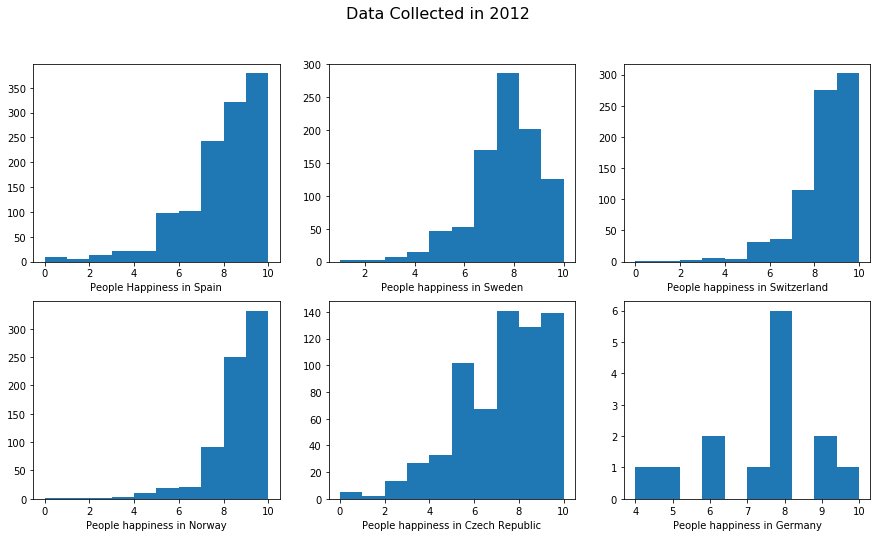

In [90]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.hist(df_2012.loc[df_2012['cntry'] =='ES', 'happy'])
plt.xlabel('People Happiness in Spain')


plt.subplot(2, 3, 2)

plt.hist(df_2012.loc[df_2012['cntry'] =='SE', 'happy'])
plt.xlabel('People happiness in Sweden')

plt.subplot(2, 3, 3)

plt.hist(df_2012.loc[df_2012['cntry'] =='CH', 'happy'])
plt.xlabel('People happiness in Switzerland')


plt.subplot(2, 3, 4)
plt.hist(df_2012.loc[df_2012['cntry'] =='NO', 'happy'])
plt.xlabel('People happiness in Norway')


plt.subplot(2, 3, 5)

plt.hist(df_2012.loc[df_2012['cntry'] =='CZ', 'happy'])
plt.xlabel('People happiness in Czech Republic')

plt.subplot(2, 3, 6)

plt.hist(df_2012.loc[df_2012['cntry'] =='DE', 'happy'])
plt.xlabel('People happiness in Germany')

plt.suptitle('Data Collected in 2012', size = 16)
plt.show()

Most of the graphs for the different countries are negatively skewed, except for the Czech Republic.

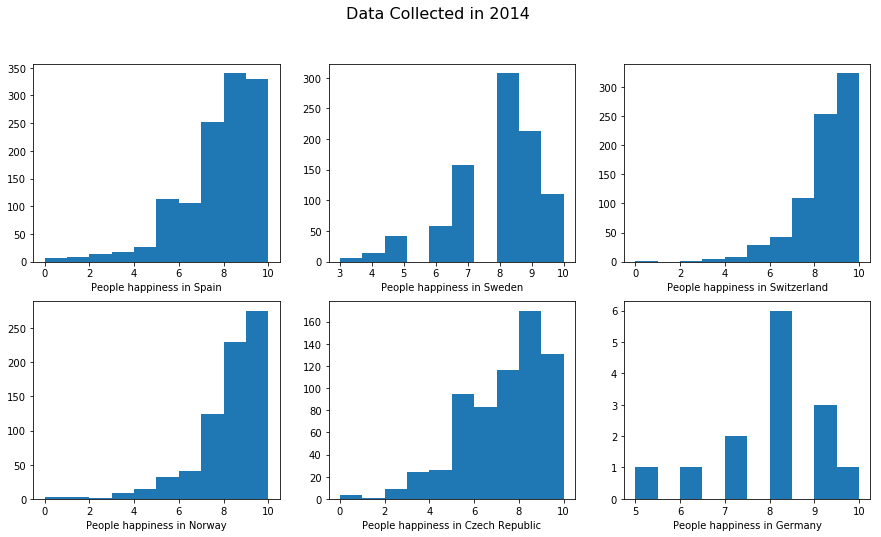

In [91]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.hist(df_2014.loc[df_2014['cntry'] =='ES', 'happy'])
plt.xlabel('People happiness in Spain')


plt.subplot(2, 3, 2)

plt.hist(df_2014.loc[df_2014['cntry'] =='SE', 'happy'])
plt.xlabel('People happiness in Sweden')

plt.subplot(2, 3, 3)

plt.hist(df_2014.loc[df_2014['cntry'] =='CH', 'happy'])
plt.xlabel('People happiness in Switzerland')


plt.subplot(2, 3, 4)
plt.hist(df_2014.loc[df_2014['cntry'] =='NO', 'happy'])
plt.xlabel('People happiness in Norway')


plt.subplot(2, 3, 5)

plt.hist(df_2014.loc[df_2014['cntry'] =='CZ', 'happy'])
plt.xlabel('People happiness in Czech Republic')

plt.subplot(2, 3, 6)

plt.hist(df_2014.loc[df_2014['cntry'] =='DE', 'happy'])
plt.xlabel('People happiness in Germany')

plt.suptitle('Data Collected in 2014', size = 16)
plt.show()

In [81]:
# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
print('For Spain we have', stats.kruskal(
    df_2012.loc[df_2012['cntry'] =='ES', 'happy'],
    df_2014.loc[df_2014['cntry'] =='ES', 'happy']))

print('\nFor Sweden we have', stats.kruskal(
    df_2012.loc[df_2012['cntry'] =='SE', 'happy'],
    df_2014.loc[df_2014['cntry'] =='SE', 'happy']))

print('\nFor Switerzeland we have', stats.kruskal(
    df_2012.loc[df_2012['cntry'] =='CH', 'happy'],
    df_2014.loc[df_2014['cntry'] =='CH', 'happy']))

print('\nFor Norway we have', stats.kruskal(
    df_2012.loc[df_2012['cntry'] =='NO', 'happy'],
    df_2014.loc[df_2014['cntry'] =='NO', 'happy']))


print('\nFor Germany we have', stats.kruskal(
    df_2012.loc[df_2012['cntry'] =='DE', 'happy'],
    df_2014.loc[df_2014['cntry'] =='DE', 'happy']))


### Using T-test b/c parametric
print('\nFor Czech Republic we have', stats.ttest_ind(
    df_2012.loc[df_2012['cntry'] =='CZ', 'happy'],
    df_2014.loc[df_2014['cntry'] =='CZ', 'happy']))

For Spain we have KruskalResult(statistic=4.0891625936314551, pvalue=0.043159020047969641)

For Sweden we have KruskalResult(statistic=0.049137438408231052, pvalue=0.82457104991493357)

For Switerzeland we have KruskalResult(statistic=0.24408334714157301, pvalue=0.62127233725833042)

For Norway we have KruskalResult(statistic=18.877181680055934, pvalue=1.3941031229053593e-05)

For Germany we have KruskalResult(statistic=0.39056749122656015, pvalue=0.53200125505866203)

For Czech Republic we have Ttest_indResult(statistic=-1.2030788199274558, pvalue=0.22916253914803522)


__pvalue < 0.05__  
For Spain   
So we can say that the population are differrent.      

__pvalue > 0.05__    
For Sweden, Switzerland, Norway, Germany and the Czech Republic.   
So for them there is a 50% chance or more that the population are similar.     

In [122]:
happy_2012  =  df_2012.groupby(df_2012['cntry'])['happy'].mean()
happy_2014  =  df_2014.groupby(df_2014['cntry'])['happy'].mean()

happy_2014 - happy_2012

cntry
CH    0.028461
CZ    0.130699
DE    0.428571
ES   -0.128607
NO   -0.335157
SE    0.039648
Name: happy, dtype: float64

For Spain and Norway, there is a decrease in people's happiness.     
For Switerzealnd and Sweden there doesn't seem to be any noticeable changes in people's trust.   
For the others there is an increase in people's happiness.    

## Q3. Who reported watching more TV in 2012, men or women?

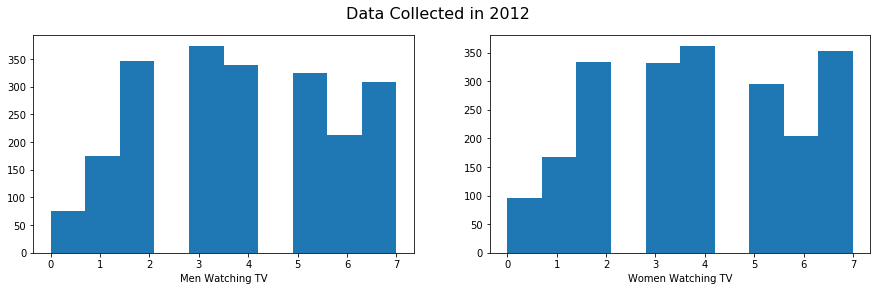

In [121]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.hist(df_2012.loc[df_2012['gndr'] == 1, 'tvtot'])
plt.xlabel('Men Watching TV')


plt.subplot(1, 2, 2)

plt.hist(df_2012.loc[df_2012['gndr'] == 2, 'tvtot'])
plt.xlabel('Women Watching TV')

plt.suptitle('Data Collected in 2012', size = 16)
plt.show()

The both look normally or more uniformly distributed.  

In [98]:
### Using T-test b/c parametric
print('\nFor TV Watching between men and women we have \n', stats.ttest_ind(
    df_2012.loc[df_2012['gndr'] ==1 , 'tvtot'],
    df_2012.loc[df_2012['gndr'] ==2, 'tvtot']))


For TV Watching between men and women we have 
 Ttest_indResult(statistic=-0.69000121725915342, pvalue=0.49023070220255527)


__pvalue > 0.05__    
There is a 49% chance or more that the population are similar.     

In [111]:
Men_2012  =  df_2012.groupby(df_2012['gndr'])['tvtot'].mean()[1]
Women_2012  =  df_2012.groupby( df_2012['gndr'])['tvtot'].mean()[2]

Men_2012- Women_2012

-0.042427657407178909

It looks like women watched more TV in 2012.

## Q4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

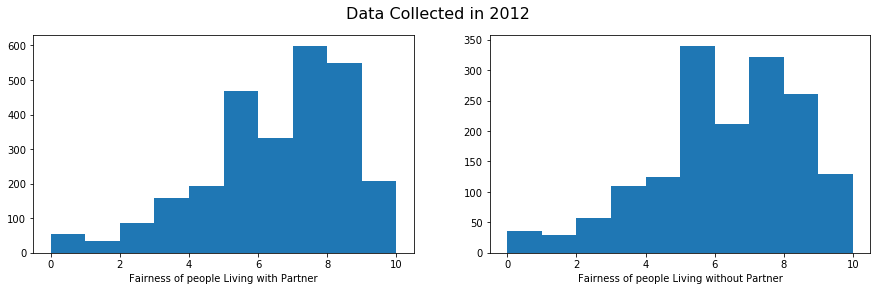

In [120]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.hist(df_2012.loc[df_2012['partner'] == 1, 'pplfair'])
plt.xlabel('Fairness of people Living with Partner')


plt.subplot(1, 2, 2)

plt.hist(df_2012.loc[df_2012['partner'] == 2, 'pplfair'])
plt.xlabel('Fairness of people Living without Partner')

plt.suptitle('Data Collected in 2012', size = 16)
plt.show()

The both look negatively distributed.  

In [117]:
### Using T-test b/c parametric
print('\nFor TV Watching between men and women we have \n', stats.kruskal(
    df_2012.loc[df_2012['partner'] ==1 , 'pplfair'],
    df_2012.loc[df_2012['partner'] ==2, 'pplfair']))


For TV Watching between men and women we have 
 KruskalResult(statistic=14.02005857012386, pvalue=0.00018087084877865917)


__pvalue < 0.05__    
We can say that the populations are different.     

In [119]:
With_partner  =  df_2012.groupby(df_2012['partner'])['pplfair'].mean()[1]
Without_partner  =  df_2012.groupby( df_2012['partner'])['pplfair'].mean()[2]

Without_partner - With_partner

-0.22475866105819886

We can say that people living with partner are more fair than those living without a partner.

## Q5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

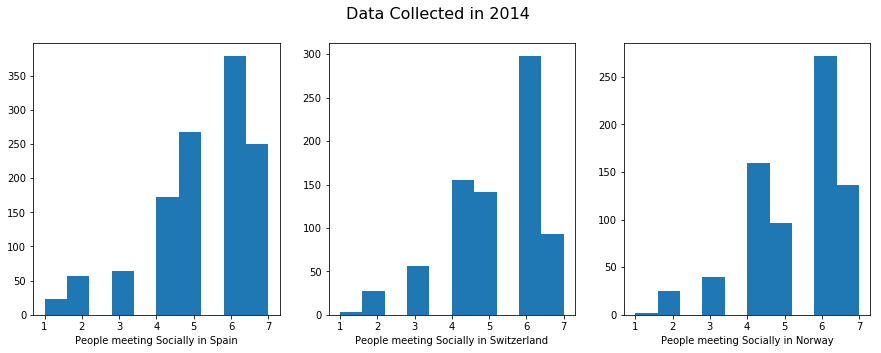

In [123]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df_2014.loc[df_2014['cntry'] =='ES', 'sclmeet'])
plt.xlabel('People meeting Socially in Spain')


plt.subplot(1, 3, 2)

plt.hist(df_2014.loc[df_2014['cntry'] =='CH', 'sclmeet'])
plt.xlabel('People meeting Socially in Switzerland')

plt.subplot(1, 3, 3)

plt.hist(df_2014.loc[df_2014['cntry'] =='NO', 'sclmeet'])
plt.xlabel('People meeting Socially in Norway')

plt.suptitle('Data Collected in 2014', size = 16)
plt.show()

The look negatively distributed.  

In [125]:
print('For Spain and Switzerland we have', stats.kruskal(
    df_2014.loc[df_2014['cntry'] =='ES', 'sclmeet'],
    df_2014.loc[df_2014['cntry'] =='CH', 'sclmeet']))

print('\nFor Spain and Norway we have', stats.kruskal(
    df_2014.loc[df_2014['cntry'] =='ES', 'sclmeet'],
    df_2014.loc[df_2014['cntry'] =='NO', 'sclmeet']))


print('\nFor Switzerland and Norway we have', stats.kruskal(
    df_2014.loc[df_2014['cntry'] =='CH', 'sclmeet'],
    df_2014.loc[df_2014['cntry'] =='NO', 'sclmeet']))

For Spain and Switzerland we have KruskalResult(statistic=6.2344736378748307, pvalue=0.012528682638278613)

For Spain and Norway we have KruskalResult(statistic=0.0063416166873908868, pvalue=0.9365281395943037)

For Switzerland and Norway we have KruskalResult(statistic=5.7803070272729276, pvalue=0.016206710193594386)


__pvalue < 0.05__  
For Spain vs Switzerland  and Switzerland vs Norway.    
So we can say that the population are differrent.      

__pvalue > 0.05__    
For Spain vs Norway.   
So for them there is a 93% chance or more that the population are similar. 

It looks like Switzerland stands out, how people socially meet there is different than in Spain and Norway. 

## Q6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [131]:
print('For Spain and Switzerland we have', stats.ttest_ind(
    df_2014.loc[df_2014['cntry'] =='ES', ['agea','sclact']],
    df_2014.loc[df_2014['cntry'] =='CH', ['agea','sclact']]))

print('\nFor Spain and Norway we have', stats.ttest_ind(
    df_2014.loc[df_2014['cntry'] =='ES', ['agea','sclact']],
    df_2014.loc[df_2014['cntry'] =='NO', ['agea','sclact']]))


print('\nFor Switzerland and Norway we have', stats.ttest_ind(
    df_2014.loc[df_2014['cntry'] =='CH', ['agea','sclact']],
    df_2014.loc[df_2014['cntry'] =='NO', ['agea','sclact']]))

For Spain and Switzerland we have Ttest_indResult(statistic=array([ 2.18991846, -3.69594177]), pvalue=array([ 0.02864622,  0.00022501]))

For Spain and Norway we have Ttest_indResult(statistic=array([ 1.52169065, -5.52129098]), pvalue=array([  1.28249411e-01,   3.81737742e-08]))

For Switzerland and Norway we have Ttest_indResult(statistic=array([-0.57558375, -1.67217796]), pvalue=array([ 0.56498279,  0.09469751]))


__pvalue < 0.05__  
For Spain vs Switzerland, Spain vs Norway and Switzerland vs Norway (social activit)   .    
So we can say that the population are differrent.      

__pvalue > 0.05__    
For Switzerland vs Norway for age of respondents only   
So for them there is a 56% chance or more that the population are similar. 

In [132]:
ES_soclact = df_2014[df_2014['cntry'] == 'ES'][['agea','sclact']].mean()
CH_soclact = df_2014[df_2014['cntry'] == 'CH'][['agea','sclact']].mean()
NO_soclact = df_2014[df_2014['cntry'] == 'NO'][['agea','sclact']].mean()

In [134]:
ES_soclact - CH_soclact.head() 

,agea,sclact
773,-20.978566,-1.374279
774,18.021434,-0.374279
775,-0.978566,-2.374279
776,-2.978566,0.625721
777,16.021434,0.625721
